In [87]:
# Import Package that required
import pandas as pd
import numpy as np
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
credits_df = pd.read_csv('D:\\myworkspace\\ML\\tmdb_5000_credits.csv')
movies_df = pd.read_csv('D:\\myworkspace\\ML\\tmdb_5000_movies.csv')

In [89]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [90]:
# Step 1 
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'original_title']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [91]:
movies_df.shape


(4804, 13)

In [92]:
# Delete Duplicates data
movies_df = movies_df.drop_duplicates(keep='first')

movies_df.shape

(4803, 13)

In [93]:
# Replacing all the zeros from revenue and bidget cols,
cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)
#droping all the rows with na in the columns mentioned about in the list
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 13)

In [94]:
# Changing the release data column to datetime column
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To anser the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


In [95]:
movies_df.dtypes

budget                         float64
genres                          object
id                               int64
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [96]:
#  Changing the data type of the below mentioned columns adn 
change_cols = ['budget', 'revenue']
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

In [97]:
# we see that there are columns which are in json format,
# let's flatten these json data into easyily interpretable lists

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index, i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)


parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('production_companies', 'name')

movies_df.head()

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [100]:
# Step 2
# Anser to question @1
# To find out the most expensive movies, 
expensive_movies_df=movies_df.sort_values(by='budget', ascending=False).head()
expensive_movies_df


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,"['Marvel Studios', 'Prime Focus', 'Revolution ...",['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,"['DC Comics', 'Legendary Pictures', 'Warner Br...",['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [132]:
# Find the most profitable movies,
movies_df['profit'] = movies_df['revenue']-movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
         'vote_average',
         'vote_count']

movies_df = movies_df[cols]
profit_data = movies_df.sort_values(by=['budget'], ascending=False)
profit_data.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
17,380000000,665713802,1045713802,"[Adventure, Action, Fantasy]",1865,135.413856,['United States of America'],2011-05-14,2011,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,1125403694,1405403694,"[Action, Adventure, ScienceFiction]",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,7.3,6767
10,270000000,121081192,391081192,"[Adventure, Fantasy, Action, ScienceFiction]",1452,57.925623,['United States of America'],2006-06-28,2006,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400
4,260000000,24139100,284139100,"[Action, Adventure, ScienceFiction]",49529,43.926995,['United States of America'],2012-03-07,2012,132.0,['English'],John Carter,6.1,2124


In [133]:
# Find Average Runtime


average = movies_df['runtime'].mean()
print("Average",average)

maximum = movies_df['runtime'].max()
print("Maximum",maximum)

Average 110.72437287085785
Maximum 338.0


In [134]:
# Movies rated above 7
movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']",Avatar,7.2,11800
3,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],The Dark Knight Rises,7.6,9106
6,260000000,331794936,591794936,"[Animation, Family]",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],Tangled,7.4,3330
7,280000000,1125403694,1405403694,"[Action, Adventure, ScienceFiction]",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],Avengers: Age of Ultron,7.3,6767
8,250000000,683959197,933959197,"[Adventure, Fantasy, Family]",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293
12,200000000,865659812,1065659812,"[Adventure, Fantasy, Action]",58,145.847379,"['Jamaica', 'United States of America', 'Baham...",2006-06-20,2006,151.0,"['English', 'Türkçe', 'ελληνικά', '普通话']",Pirates of the Caribbean: Dead Man's Chest,7.0,5246
16,220000000,1299557910,1519557910,"[ScienceFiction, Action, Adventure]",24428,144.448633,['United States of America'],2012-04-25,2012,143.0,['English'],The Avengers,7.4,11776
19,250000000,706019788,956019788,"[Action, Adventure, Fantasy]",122917,120.965743,"['New Zealand', 'United States of America']",2014-12-10,2014,144.0,['English'],The Hobbit: The Battle of the Five Armies,7.1,4760
22,250000000,708400000,958400000,"[Adventure, Fantasy]",57158,94.370564,"['New Zealand', 'United States of America']",2013-12-11,2013,161.0,['English'],The Hobbit: The Desolation of Smaug,7.6,4524
25,200000000,1645034188,1845034188,"[Drama, Romance, Thriller]",597,100.025899,['United States of America'],1997-11-18,1997,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562


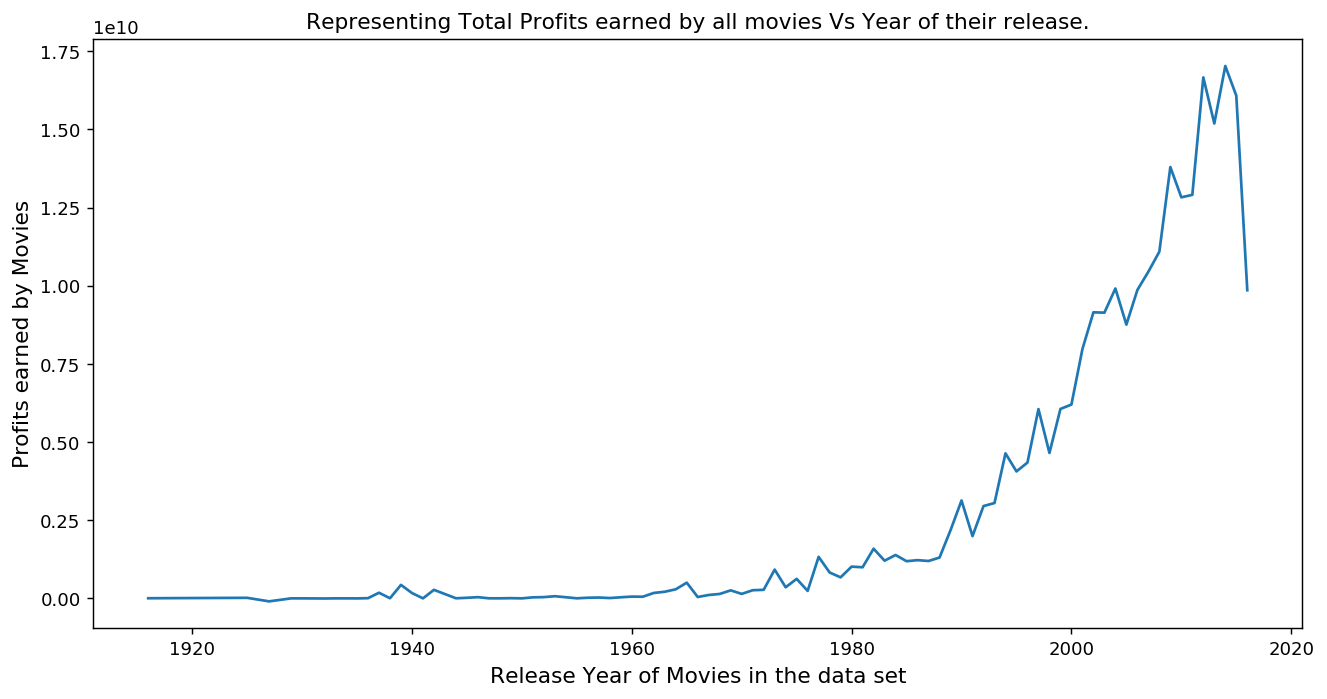

In [135]:
# Most profitable movies by year

profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

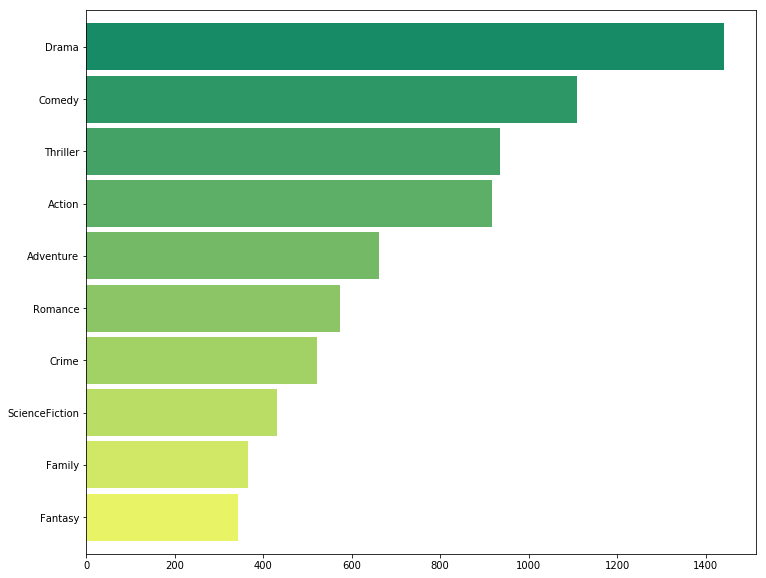

In [136]:
# stage 3
# Formatting the data
plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in profit_data['genres']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)
# output looks like
# Crime             170
# Fantasy           193
# ScienceFiction    195
# Romance           196
# Family            213
# Thriller          362

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax